## 6.2 Exploring relationships  

This script contains the following:  

01. Importing Visualization Libraries and Data  
02. Correlations  
03. Scatterplots  
04. Pair Plot  
05. Categorical Plot  
06. Questions  
07. Hypotheses  

### 1. Importing Visualization Libraries and Data

In [1]:
# Importing Visualization Libraries and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os


In [2]:
# create path
path = r'/Users/macbook/Library/CloudStorage/OneDrive-Personal/Data Analisys/Boat Sales'

In [3]:
# import boat_data_cleaned.csv
df_boat_data_cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_cleaned.csv'), index_col=[0])

In [4]:
df_boat_data_cleaned.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR Price,Country,City,Pricing Category,Boat Class,Total_views
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt,Low-priced,Class A,203469
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern,Low-priced,Class A,203469
10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.0,Switzerland,Seengen,Low-priced,Class A,316879
12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda,Low-priced,Class A,116749
13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.0,Switzerland,Zugersee,Low-priced,Class A,316879


In [5]:
df_boat_data_cleaned.dtypes

Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
EUR Price                      float64
Country                         object
City                            object
Pricing Category                object
Boat Class                      object
Total_views                      int64
dtype: object

In [6]:
for col in df_boat_data_cleaned.columns.tolist():
      weird = (df_boat_data_cleaned[[col]].applymap(type) != df_boat_data_cleaned[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_boat_data_cleaned[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

In [7]:
#fuel types set 
fuel_types = ['Diesel', 'Electric', 'Unleaded', 'Display Model', 'Gas', 'Hybrid', 'Propane']
#helper function to return the fuel type 
def fuel_split(type_and_fuel):
    parts = type_and_fuel.split(',')
    for item in parts:
        if item in fuel_types:
            return item
    return None

In [8]:
# create new Type_split column with only the boat type checking whether it is not a fuel type
df_boat_data_cleaned['Type_split'] = df_boat_data_cleaned['Type'].apply(lambda x: x.split(',')[0] if not (x.split(',')[0] in fuel_types) else None)
#create new Fuel column fith fuel type
df_boat_data_cleaned['Fuel'] = df_boat_data_cleaned.apply(lambda row: fuel_split(row['Type']), axis=1)

In [9]:
df_boat_data_cleaned.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR Price,Country,City,Pricing Category,Boat Class,Total_views,Type_split,Fuel
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt,Low-priced,Class A,203469,new boat from stock,None
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern,Low-priced,Class A,203469,new boat from stock,None
10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.0,Switzerland,Seengen,Low-priced,Class A,316879,Used boat,Electric
12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda,Low-priced,Class A,116749,Used boat,None
13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.0,Switzerland,Zugersee,Low-priced,Class A,316879,new boat from stock,None


### 2. Correlations

In [10]:
df_boat_data_cleaned.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Number of views last 7 days', 'EUR Price', 'Country',
       'City', 'Pricing Category', 'Boat Class', 'Total_views', 'Type_split',
       'Fuel'],
      dtype='object')

In [11]:
# creating subset excluding categorical variables
sub = df_boat_data_cleaned[['Year Built', 'Length', 'Width', 'Number of views last 7 days', 'EUR Price']]

In [12]:
sub

,Year Built,Length,Width,Number of views last 7 days,EUR Price
1,2020,4.00,1.50,75,3490.00
4,2019,3.55,1.46,58,3399.00
10,1987,4.35,1.75,239,3570.00
12,2004,4.70,2.00,69,3500.00
13,2020,4.40,1.65,113,4692.00
...,...,...,...,...,...
9877,1974,7.20,2.70,1299,5100.00
9878,1980,6.00,2.10,1917,5098.98
9882,1984,6.00,1.62,288,5049.00
9885,2020,4.40,1.80,354,4499.00


In [13]:
# Create a correlation matrix using pandas
sub.corr(method='pearson')

,Year Built,Length,Width,Number of views last 7 days,EUR Price
Year Built,1.000000,-0.109371,-0.096872,-0.199541,0.116957
Length,-0.109371,1.000000,0.915815,-0.157784,0.628959
Width,-0.096872,0.915815,1.000000,-0.171367,0.540845
Number of views last 7 days,-0.199541,-0.157784,-0.171367,1.000000,-0.038727
EUR Price,0.116957,0.628959,0.540845,-0.038727,1.000000


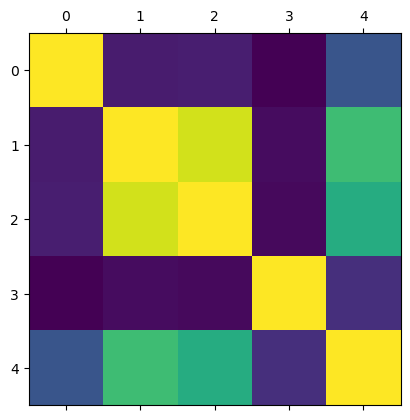

In [14]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

In [15]:
#current dir
cwd = os.getcwd()
cwd

'/Users/macbook/Library/CloudStorage/OneDrive-Personal/Data Analisys/Boat Sales/Python'

Text(0.5, 1.0, 'Correlation Matrix')

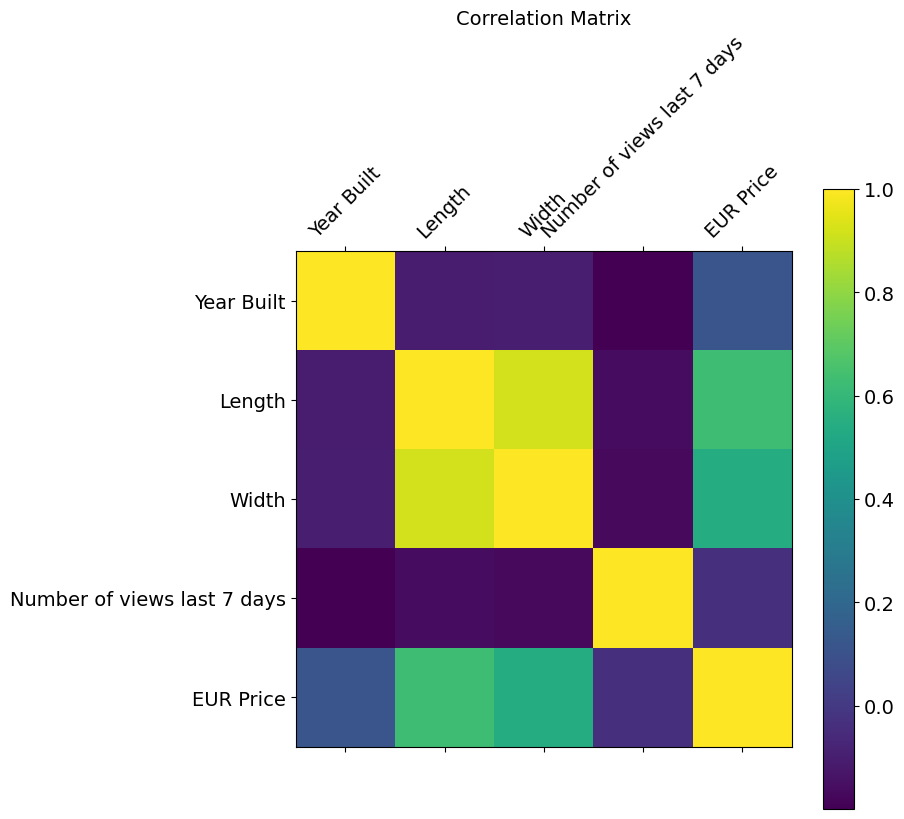

In [16]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

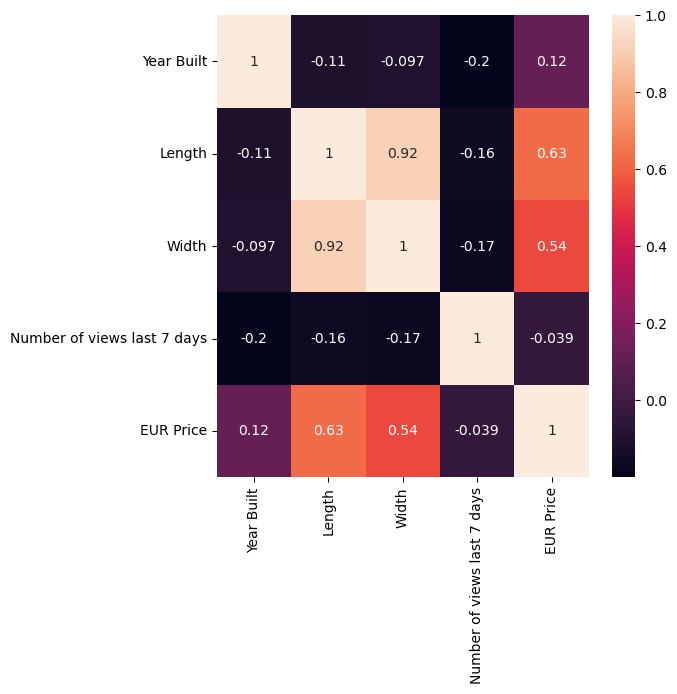

In [17]:
# creating subplot with matplotlib
f,ax = plt.subplots(figsize=(6,6))

# corelation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

In [18]:
# Exporting 
corr.figure.savefig(os.path.join(path, '05 Visualization', 'corelation_heatmap.png'))

Boat length and width have a high correlation of 0.92, which makes sense since most boats increase in size proportionately. However, when comparing the factors with the European price, the length correlation coefficient is only 0.63, while the width correlation coefficient is 0.54. Interestingly, the number of views and the price have a negative correlation coefficient, which means that both variables move in opposite directions. Other than length and width, there are no strong correlation coefficients

### 3. Scatterplot

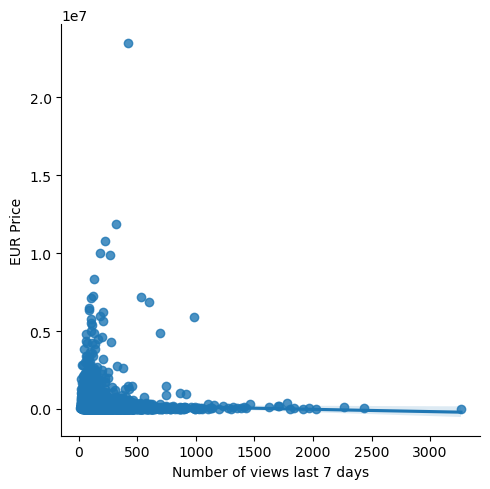

In [19]:
# Scatterplot for the "Number of views last 7 days" and the "EUR_price"
sns.lmplot(x='Number of views last 7 days', y ='EUR Price', data = df_boat_data_cleaned)

There is high concentration of views for listing prices under 500,000 euros, with the highest number of views for a particular listing being over 3000 views for a boat under 200,000 euros. It appears that most customers viewing boats have a budget of around 300,000 euros. Interestingly, there is a boat listed well above 20,000,000 euros that has had 500 views in the past 7 days. This may potentially due to the customers admiring the boat and being curious as to what the highest priced listing was.

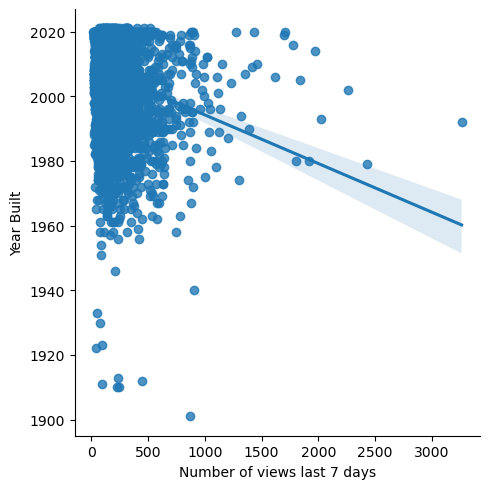

In [23]:
# Scatterplot for the "Number of views last 7 days" and the "Year Built"
sns.lmplot(x='Number of views last 7 days', y ='Year Built', data = df_boat_data_cleaned)

There is a concentration of boats manufacturered between the years 1960 and 2020. There is a visible downward trend meaning that people are potentially favoring older models. This could be due to price and/or other factors as well.

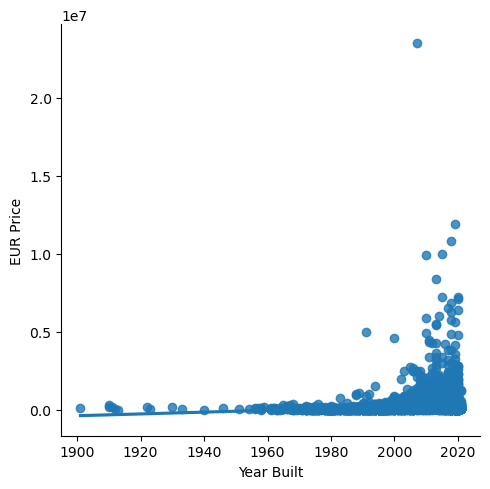

In [24]:
# Scatterplot for the "Year Built" and the "EUR Price"
sns.lmplot(x='Year Built', y ='EUR Price', data = df_boat_data_cleaned)

There is a slight upward trend. The most expensive price for boats are boats manufactured after 2018. It is logical to assume that newer models are selling at a higher price, which may be related to previous charts, as the website's customers prefer cheaper boats. In addition, other qualitative variables, such as the condition and type of the boat, can also influence the listing price.

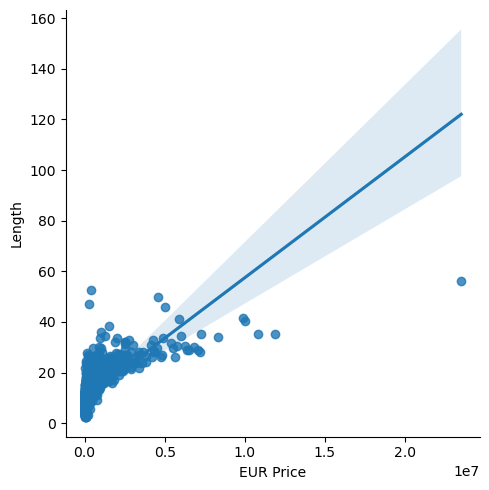

In [39]:
# Creating a random sample of sub dataframe to use for scatterplot
# Create a scatterplot for the "Price" and "Length" columns in seaborn

sns.lmplot(x = 'EUR Price', y = 'Length', data = df_boat_data_cleaned)


In [40]:
# Exporting 
plt.savefig(os.path.join(path, '05 Visualization', 'Scatterplot EUR Price and Length.png'))

<Figure size 640x480 with 0 Axes>

There is a positive relationship between the Length of the boat and the price. In reality, the longer the boat, the more expensive it is. However, most of the boat (about 80%) have their price below 5 million euro.

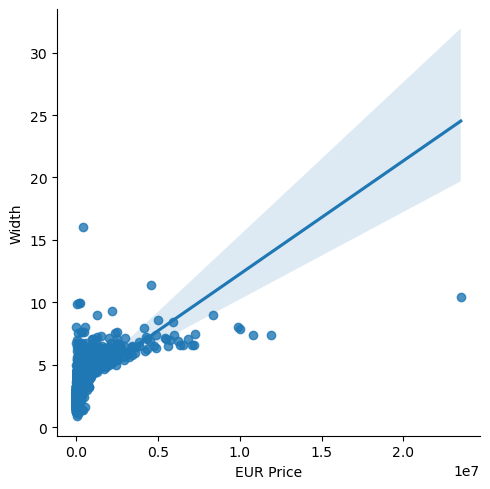

In [31]:
# Create a scatterplot for the "Price" and "Width" columns in seaborn
sns.lmplot(x = 'EUR Price', y = 'Width', data = df_boat_data_cleaned)

In [38]:
# Exporting 
plt.savefig(os.path.join(path, '05 Visualization', 'Scatterplot EUR Price and Width.png'))

<Figure size 640x480 with 0 Axes>

Also, like the Length, there is a positive relationship between the Width of the boat and the price. In reality, the wider the boat, the more expensive it is. However, most of the boat (about 80%) have their price below 5 million euro.

### 04. Pair plots

In [ ]:
sub.columns

In [ ]:
g = sns.pairplot(sub)

In [ ]:
# Exporting 
g.figure.savefig(os.path.join(path, '05 Visualization', 'Pair plots.png'))

There is a positivie correlation between listing price and length as well as listing price and width. It would be interesting to know if there are other factors that contributes to this. Such as type of boats, manufacturer, location amongst others.  
Likewise, the is a postive relationship between price and built year (0.12). However, it can be seen from the the plot that quite a number of newer boats are also cheap. Therefore, I would like to explore the main determinant of the boat prices


### 05. Categorical plots

In [ ]:
# creating a histogram of listing prices to visualize the distribution
sns.histplot(df_boat_data_cleaned['EUR Price'], bins = 50, kde = True)

In [ ]:
# creating listing price categories
df_boat_data_cleaned.loc[sub['EUR Price'] <50000, 'Pricing Category'] = 'Low-priced'
df_boat_data_cleaned.loc[(sub['EUR Price'] >=50000) & (df_boat_data_cleaned['EUR Price'] <=100000), 'Pricing Category'] = 'Mid-Priced'
df_boat_data_cleaned.loc[sub['EUR Price'] >100000, 'Pricing Category'] = 'High-Priced'

In [ ]:
df_boat_data_cleaned['Pricing Category'].value_counts(dropna=False)

In [ ]:
# creating a categorical plot crossing the number of views with related variables
sns.set(style='ticks')
g = sns.catplot(x='Number of views last 7 days', y='EUR Price', hue = 'Pricing Category', data = df_boat_data_cleaned)

In [ ]:
# creating a categorical plot crossing the number of views with boat material
sns.set(style='ticks')
g = sns.catplot(x='Number of views last 7 days', y='Material', hue = 'Pricing Category', data = df_boat_data_cleaned)

In [ ]:
# Create a histogram of duration variable 
sns.histplot(df_boat_data_cleaned['Length'], bins =20, kde = True )

In [ ]:
# source- https://www.omao.noaa.gov/learn/small-boat-program/resources/length-vessel-class

# Create a categorical variable of Lenth with categories for Class A, Class I, Class II, Class III and Small Research Vessel (SRV). durations
df_boat_data_cleaned.loc[df_boat_data_cleaned['Length'] < 4.88, 'Boat Class'] = 'Class A'
df_boat_data_cleaned.loc[(df_boat_data_cleaned['Length'] >= 4.88) & (df_boat_data_cleaned['Length'] < 7.93), 'Boat Class'] = 'Class I'
df_boat_data_cleaned.loc[(df_boat_data_cleaned['Length'] >= 7.93) & (df_boat_data_cleaned['Length'] < 12.19), 'Boat Class'] = 'Class II'
df_boat_data_cleaned.loc[(df_boat_data_cleaned['Length'] >= 12.19) & (df_boat_data_cleaned['Length'] <= 19.81), 'Boat Class'] = 'Class III'
df_boat_data_cleaned.loc[df_boat_data_cleaned['Length'] > 19.81, 'Boat Class'] = 'Small Research Vessel'

In [ ]:
# Checking the distribution of the Boat Class category variable 
df_boat_data_cleaned['Boat Class'].value_counts(dropna = False)

In [ ]:
# Create a categorical plot in seaborn using the boat class categories created above
sns.set(style="ticks")
cat_plot = sns.catplot(x="EUR Price", y="Length", hue="Boat Class", data= df_boat_data_cleaned.sample(1000))

The categorical plot shows that the price of the boat increases according to the length measured in meters. In general, Class A boats are the shortest and consequently are amongest the cheapest. Likewise, SRV and Class III boats are amongst the two longest boat and also the most expensive out of the lots.

In [ ]:
df_boat_data_cleaned['Material'].value_counts(dropna=False)

In [ ]:
df_boat_data_cleaned['Country'].value_counts(dropna=False)

In [ ]:
# plot_data = df_boat_data_cleaned[high_views]['Country'].value_counts()[:10]
plot_data = df_boat_data_cleaned['Country'].value_counts()[:15]

fig, ax = plt.subplots(figsize = (6,4))

sns.barplot(y=plot_data.index, x = plot_data.values, ax=ax)
ax.set(xlabel = 'Number of listings', ylabel = 'Country', title = 'Total Number of Listings Based on Country')
plt.show()

In [ ]:
top10countries_by_views = df_boat_data_cleaned.groupby('Country')['Number of views last 7 days'].sum().sort_values(ascending=False)[:15]
# print(top10countries_by_views)

plot_data = top10countries_by_views
fig, ax = plt.subplots(figsize = (6,4))
sns.barplot(y=plot_data.index, x = plot_data.values, ax=ax)
ax.set(xlabel = 'Total Number of Views Last 7 Days', ylabel = 'Country', title = 'Top 10 Countries in Total Views')
plt.show()

### 06. Questions and Answers

In general, bigger boats are more expensive. This includes Class III boats and SRV with fewer demands.    
#### ● Characteristics of the most viewed boat listing in the last 7 days?  
Most viewed boats in the past week are listed above 100,000 euro.  
#### ● What is the price of boat that get the most views?  
Boats listed above 100,000 euros are getting the most views and then boats between 50,000 and 100,000 euros are getting the least amount of views.  
#### ● Are there common features among the most viewed boats?  
Older boats are getting the most views. Boats made out of GRP are most listed.  
#### ● What is the location of the most viewed boat?  
Germany, Italy, Switzerland, France, Spain have the most boats listed. But most viewed boats in the last 7 days in Switzerland, Germany, Italy, France - knowing the order, we can plan a marketing budget.

### 07. Hypothesis

If a boat listed is over 100,000 euroes, then it will generate web traffic and get more views.  
If a boat listed is an older model, then it will generate web traffic and get more views.  
If a boat listed is made out of GRP, then it will generate web traffic and get more views.  

In [ ]:
# Export data to pkl
df_boat_data_cleaned.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'boat_sales_cleaned2.pkl'))

In [ ]:
# Export data to csv
df_boat_data_cleaned.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_sales_cleaned2.csv'))